Homework 7
Practice training a deep neural network on the CIFAR10 image dataset:

Visualize 20 examples of CIFAR. You can load it with keras.datasets.cifar10.load_data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes.

Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function. (use a for loop!!)

Using Adam optimization and early stopping, train the network on the CIFAR10 dataset. You’ll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.

Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

Try replacing Batch Normalization with SELU, and make the necessary adjustments to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.)



# Load Libraries and Data

In [10]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train_full = X_train_full.astype('float32')
X_test = X_test.astype('float32')

X_train_full = X_train_full / 255.0
X_test = X_test / 255.0




## Split Training and Validation Sets

In [4]:
# Set First 42000 for training and 8000 for validation

X_valid, X_train = X_train_full[:8000], X_train_full[8000:]

y_valid, y_train = y_train_full[:8000], y_train_full[8000:]

In [5]:
X_train_full.shape

(50000, 32, 32, 3)

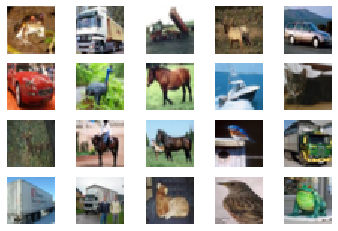

In [6]:
# Visualize first 20 images

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train_full[i])
    plt.axis('off')

plt.show()

# Define and Train Neural Networks

## Example 1: He_normal Initializer, Adam Optimizer, ELU activation 

In [7]:
# Define Model
earlystopping_cb = keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
for layer in range(19):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

#SCE learnin rate found to be highest at 1e-4
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=["accuracy"])

In [8]:
# Train Model
history1 = model.fit(X_train, y_train, epochs=50, callbacks=[earlystopping_cb], batch_size=64,
                    validation_data=(X_valid, y_valid))

Train on 42000 samples, validate on 8000 samples
Epoch 1/50
42000/42000 [==============================] - 12s 280us/sample - loss: 1.9443 - accuracy: 0.2922 - val_loss: 1.7878 - val_accuracy: 0.3471
Epoch 2/50
42000/42000 [==============================] - 11s 270us/sample - loss: 1.7405 - accuracy: 0.3662 - val_loss: 1.6961 - val_accuracy: 0.3828
Epoch 3/50
42000/42000 [==============================] - 13s 304us/sample - loss: 1.6633 - accuracy: 0.3983 - val_loss: 1.6948 - val_accuracy: 0.3832
Epoch 4/50
42000/42000 [==============================] - 13s 300us/sample - loss: 1.6134 - accuracy: 0.4197 - val_loss: 1.6084 - val_accuracy: 0.4169
Epoch 5/50
42000/42000 [==============================] - 11s 252us/sample - loss: 1.5646 - accuracy: 0.4360 - val_loss: 1.6032 - val_accuracy: 0.4232
Epoch 6/50
42000/42000 [==============================] - 10s 229us/sample - loss: 1.5272 - accuracy: 0.4528 - val_loss: 1.5368 - val_accuracy: 0.4520
Epoch 7/50
42000/42000 [=====================

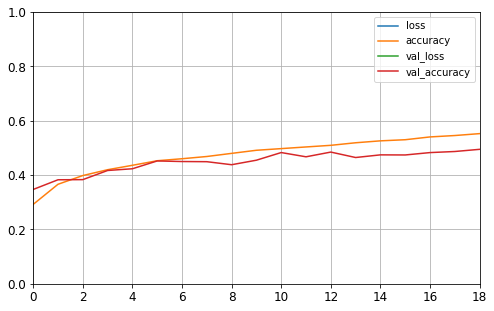

In [11]:
#View loss and Accuracy vs Epoch
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Validation accuracy seems to cap around 50%

## Example 2: Batch Normalization, He_normal Initializer, Adam Optimizer, ELU activation 

In [12]:
#Define Model
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model2.add(keras.layers.BatchNormalization())
for layer in range(19):
    model2.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
    model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(10, activation="softmax"))

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=["accuracy"])

In [13]:
#Train Model
history = model2.fit(X_train, y_train, epochs=50, callbacks=[earlystopping_cb], batch_size=64,
                    validation_data=(X_valid, y_valid))

Train on 42000 samples, validate on 8000 samples
Epoch 1/50
42000/42000 [==============================] - 31s 729us/sample - loss: 2.0958 - accuracy: 0.2534 - val_loss: 1.8416 - val_accuracy: 0.3343
Epoch 2/50
42000/42000 [==============================] - 19s 464us/sample - loss: 1.7911 - accuracy: 0.3571 - val_loss: 1.7015 - val_accuracy: 0.3936
Epoch 3/50
42000/42000 [==============================] - 21s 504us/sample - loss: 1.6924 - accuracy: 0.3953 - val_loss: 1.6251 - val_accuracy: 0.4161
Epoch 4/50
42000/42000 [==============================] - 21s 490us/sample - loss: 1.6252 - accuracy: 0.4210 - val_loss: 1.5847 - val_accuracy: 0.4364
Epoch 5/50
42000/42000 [==============================] - 19s 457us/sample - loss: 1.5698 - accuracy: 0.4412 - val_loss: 1.5318 - val_accuracy: 0.4538
Epoch 6/50
42000/42000 [==============================] - 19s 461us/sample - loss: 1.5241 - accuracy: 0.4576 - val_loss: 1.5365 - val_accuracy: 0.4566
Epoch 7/50
42000/42000 [=====================

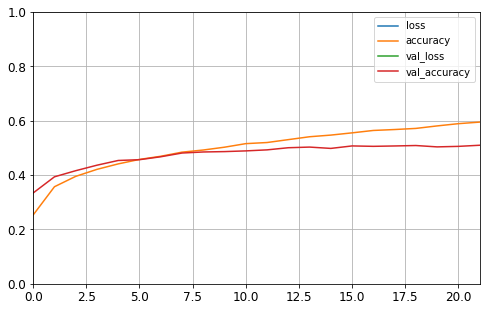

In [14]:
#View loss and Accuracy vs Epoch
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
model2.save("model2.h5")

Training time per epoch takes twice as long, but validation accuracy increased slightly to 51 %. It seems to converge faster than the previous model, however, validation and training accuracy converge quickly.

## Example 3: Lecun_normal Initializer, Adam Optimizer, SELU activation 

In [18]:
#Normalize Data
pixel_means = X_train_full.mean(axis=0, keepdims=True)
pixel_stds = X_train_full.std(axis=0, keepdims=True)
X_train_full_scaled = (X_train_full - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

X_valid, X_train = X_train_full_scaled[:8000], X_train_full_scaled[8000:]

In [19]:
#Define Model
model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model3.add(keras.layers.Dense(100, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(19):
    model3.add(keras.layers.Dense(100, activation="selu",
                             kernel_initializer="lecun_normal"))
model3.add(keras.layers.Dense(10, activation="softmax"))

model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

In [20]:
#Train Model
history = model3.fit(X_train, y_train, epochs=50, callbacks=[earlystopping_cb],
                    validation_data=(X_valid, y_valid), batch_size=64)


Train on 42000 samples, validate on 8000 samples
Epoch 1/50
42000/42000 [==============================] - 15s 362us/sample - loss: 1.8612 - accuracy: 0.3374 - val_loss: 1.7192 - val_accuracy: 0.3820
Epoch 2/50
42000/42000 [==============================] - 12s 275us/sample - loss: 1.6449 - accuracy: 0.4130 - val_loss: 1.6296 - val_accuracy: 0.4216
Epoch 3/50
42000/42000 [==============================] - 15s 361us/sample - loss: 1.5494 - accuracy: 0.4474 - val_loss: 1.5899 - val_accuracy: 0.4330
Epoch 4/50
42000/42000 [==============================] - 11s 267us/sample - loss: 1.4787 - accuracy: 0.4745 - val_loss: 1.5507 - val_accuracy: 0.4475
Epoch 5/50
42000/42000 [==============================] - 11s 274us/sample - loss: 1.4184 - accuracy: 0.4958 - val_loss: 1.5339 - val_accuracy: 0.4586
Epoch 6/50
42000/42000 [==============================] - 19s 447us/sample - loss: 1.3672 - accuracy: 0.5103 - val_loss: 1.5214 - val_accuracy: 0.4703
Epoch 7/50
42000/42000 [=====================

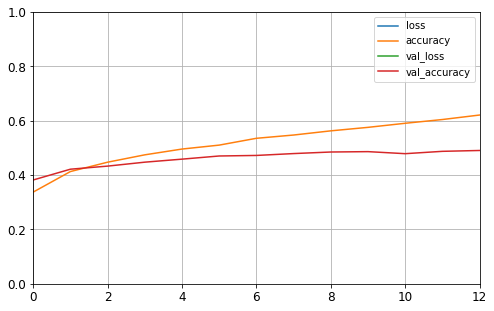

In [22]:
#View loss and Accuracy vs Epoch
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Selu activation causes it to converge quickly, but plateaus at 50%.